In [14]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 200
from scipy.stats import norm, binom

In [15]:
# Choose sample points for the plot.  we select 1001 points evenly spaced in from 0 to 1.
# We choose 1001 so the the stepsize is exactly 0.001, which is important for the numerical integration.
x = np.linspace(0,1,1001)
dx = x[1]-x[0]
k = 680
N = 1000
# Compute the terms in Bayes Theorem
prior = norm.pdf(x,loc=0.5,scale=0.01)
likelihood = binom.pmf(k, N, x)
total_probabiltiy = np.sum(prior*likelihood*dx)
# Compute the posterior probability
posterior = likelihood*prior/total_probabiltiy

In [16]:
# Confirm that the posterior is a true probability distribution by checking that its integral is equal to 1.
np.sum(posterior*dx)

1.0000000000000002

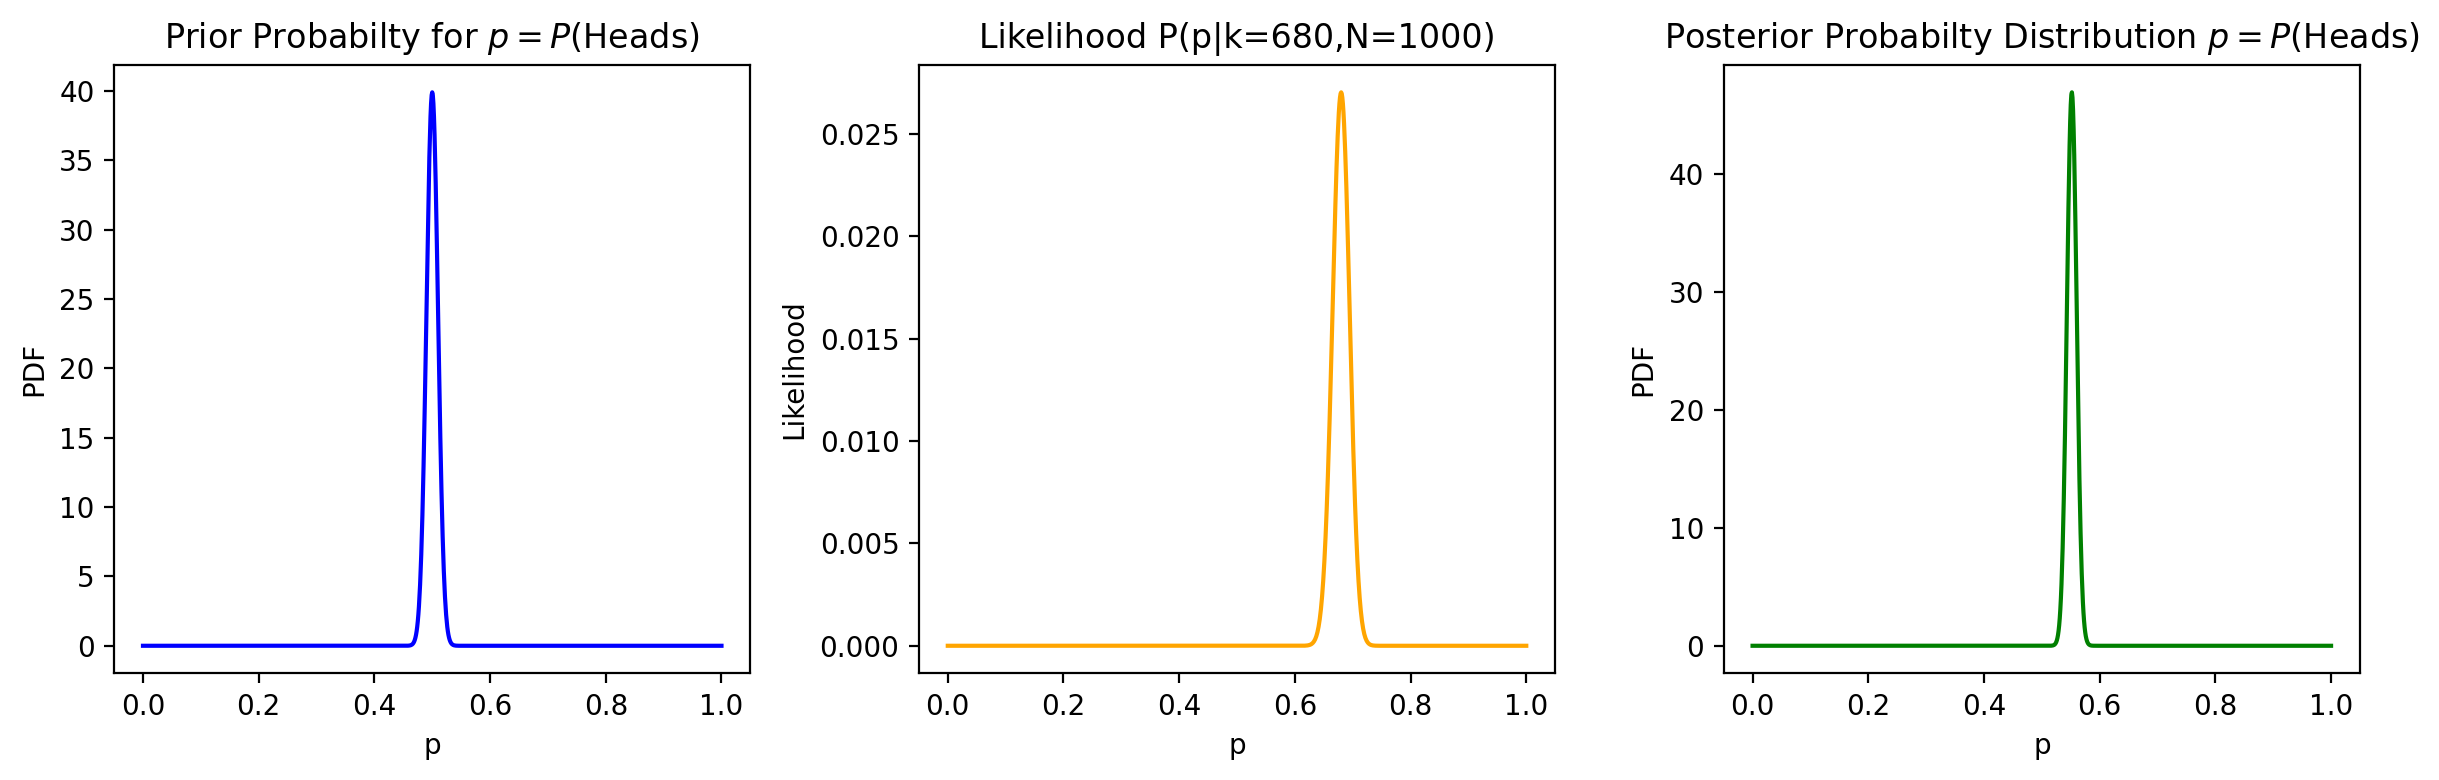

In [17]:

# Set the figure size for the plots
plt.rcParams['figure.figsize'] = [12, 4]

# Plot of the prior probability distribution
plt.subplot(1, 3, 1) # layout to make 1 row, 3 columns of plots, and create to the 1st location.
plt.plot(x, prior,'b-', label='Prior ');
plt.xlabel('p')
plt.ylabel('PDF');
plt.title('Prior Probabilty for $p=P($Heads$)$');

# Plot of the likelihood
plt.subplot(1, 3, 2) # layout to make 1 row, 3 columns of plots, and create to the 1st location.
plt.plot(x, likelihood, color='orange', label='Likelihood ');
plt.xlabel('p')
plt.ylabel('Likelihood');
plt.title('Likelihood P(p|k=680,N=1000)');

# Plot of the posterior probability distribution
plt.subplot(1, 3, 3) # layout to make 1 row, 3 columns of plots, and create to the 1st location.
plt.plot(x, posterior,'g-', label='Posterior ');
plt.xlabel('p')
plt.ylabel('PDF');
plt.title('Posterior Probabilty Distribution $p=P($Heads$)$');

plt.tight_layout() # this cleans up the spacing for plots and labels.

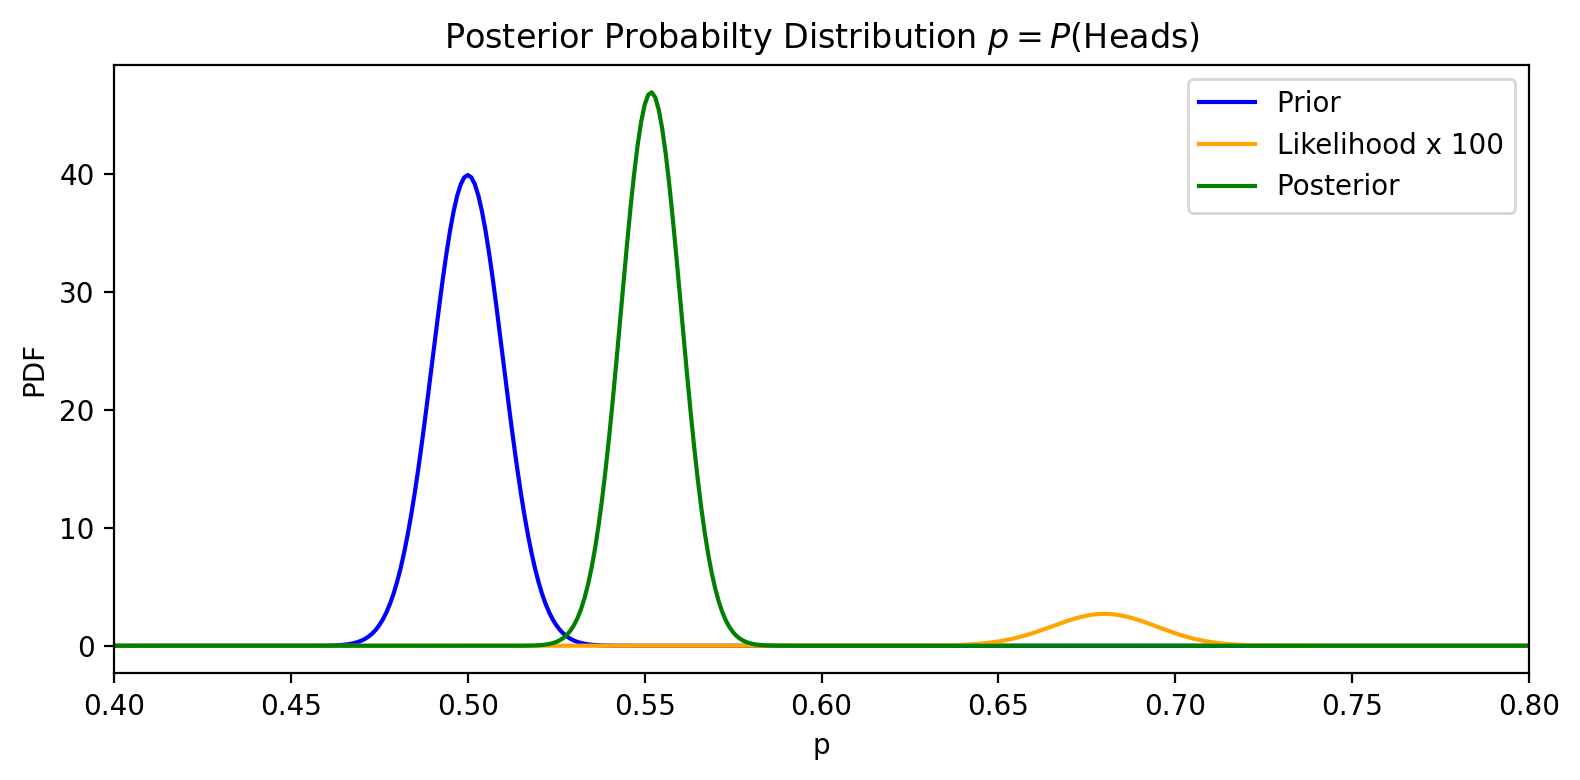

In [18]:
# Set the figure size for the plots
plt.rcParams['figure.figsize'] = [8, 4]

# Plot of the prior probability distribution
plt.plot(x, prior,'b-', label='Prior ');
plt.xlabel('p')
plt.ylabel('PDF');
plt.title('Prior Probabilty for $p=P($Heads$)$');

# Plot of the likelihood
plt.plot(x, likelihood*100, color='orange', label='Likelihood x 100');
plt.xlabel('p')
plt.ylabel('Likelihood');
plt.title('Likelihood P(p|k=68,N=100)');

# Plot of the posterior probability distribution
plt.plot(x, posterior,'g-', label='Posterior ');
plt.xlabel('p')
plt.ylabel('PDF');
plt.title('Posterior Probabilty Distribution $p=P($Heads$)$');

plt.legend()
plt.xlim([0.4,0.8])
plt.tight_layout() # this cleans up the spacing for plots and labels.

In [19]:

# Compute the middle 95% 
# Step 1: Compute the Cumulative Density Function (CDF)
cdf = np.zeros(len(posterior))
for idx in range(len(posterior)):
    cdf[idx] = np.sum(posterior[:idx])*dx
# Step 2: Compute the credible interval
a = x[np.argmin(np.abs(cdf-0.025))] # find the x-value where the cdf is closest to 0.025
b = x[np.argmin(np.abs(cdf-0.975))]# find the x-value where the cdf is closest to 0.975
print(f'The probaiblity is 0.95 that the value for p in the interval [{a},{b}].')

The probaiblity is 0.95 that the value for p in the interval [0.536,0.5690000000000001].
